In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Region'] = dengue['Region'].astype('category')
dengue['Month'] = dengue['Month'].astype('category')

In [7]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [8]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [9]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<hr>
<h1>1. How have dengue cases changed over the years from 2016 to 2020?<h1>

In [10]:
dengue_case_trend = dengue.groupby(['Month', 'Year'])['Dengue_Cases'].sum().unstack()
dengue_case_trend

Year,2016,2017,2018,2019,2020
Month,,,,,
April,7269,6343,6860,9252,2784
August,36195,25039,34210,85038,7072
December,13490,13235,31353,24397,5956
February,12386,9872,10466,25494,19583
January,17052,15623,12657,20672,18324
July,29744,18340,30363,55220,4575
June,10831,7589,11502,25523,2665
March,9300,7696,7944,19798,12838
May,8092,4853,6594,10387,2461


<Figure size 1200x600 with 0 Axes>

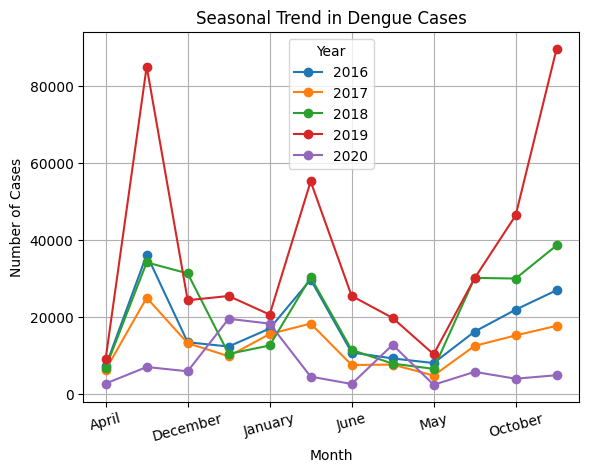

In [11]:
plt.figure(figsize=(12,6))
dengue_case_trend.plot(kind='line', marker='o')
plt.title("Seasonal Trend in Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

<hr>

In [12]:
dengue_cases_by_year = dengue.groupby('Year')['Dengue_Cases'].sum()
print(dengue_cases_by_year)

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64


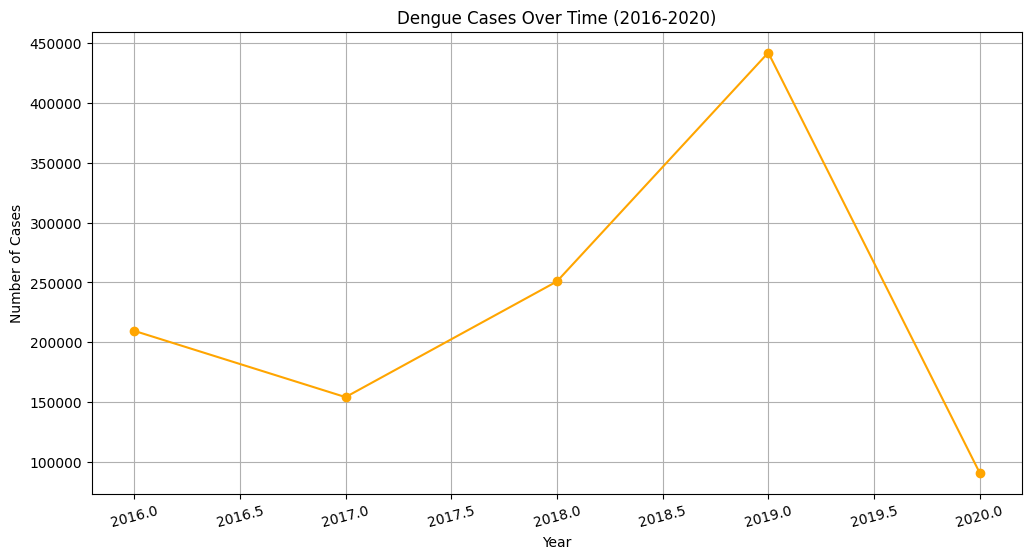

In [13]:
plt.figure(figsize=(12,6))
dengue_cases_by_year.plot(kind='line', marker='o', color='orange')
plt.title("Dengue Cases Over Time (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.xticks(rotation=15)
plt.grid()
plt.show()

<hr>
<h1>Insight 1<h1>
<p>From year 2016 with 209544 Dengue Cases, it goes down to 154155 Dengue Cases in 2017, but it rises again in the year 2018 with 250783 Dengue Cases then it skyrocketted in 2019, which had the most number of Dengue Cases then it landslides in the year 2020 with 91041 Dengue Cases<p>
<p>This line graph only shows that the Health Department and Enviromental Department put emphasis on having a clean enviroment makes our community less prone to Dengue that's why 441902 Dengue Cases in year 2019 shrink down to 91041 in year 2020<p>

<hr>
<h1>2. Is there a seasonal trend in dengue cases? Are there peak months each year?<h1>



In [14]:
dengue_cases_by_month = dengue.groupby('Month')['Dengue_Cases'].sum()
print(dengue_cases_by_month)

Month
April         32508
August       187554
December      88431
February      77801
January       84328
July         138242
June          58110
March         57576
May           32387
November      94900
October      117645
September    177943
Name: Dengue_Cases, dtype: int64


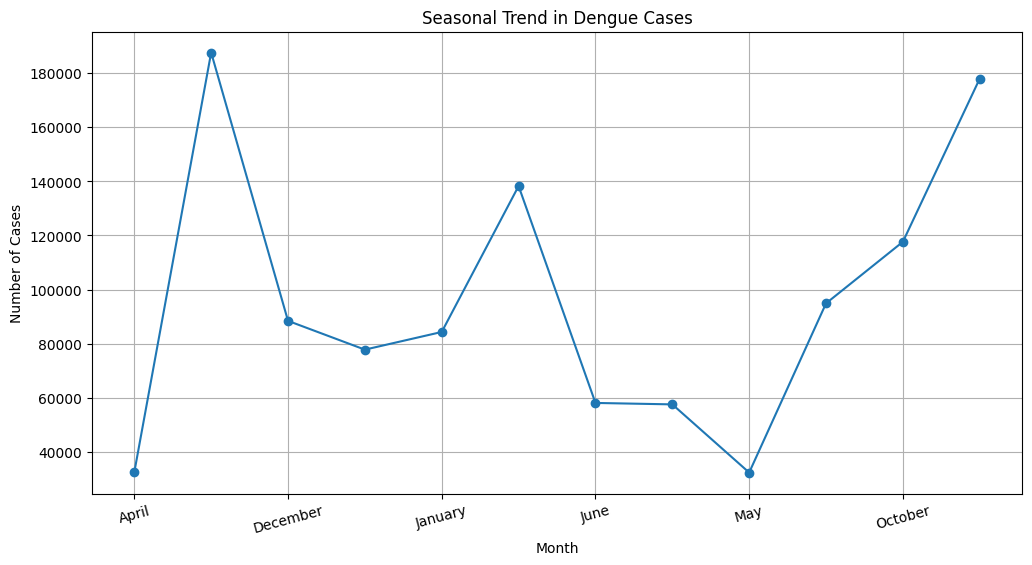

In [15]:
plt.figure(figsize=(12,6))
dengue_cases_by_month.plot(kind='line', marker='o')
plt.title("Seasonal Trend in Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

<hr>
<h1>Insight 2<h1>
<p>This study shows that the peak seasons or the months that have the most of Dengue Cases occur starting from the month of May to September that seems to be rainy seasons when mosquitoes active breeding

<hr>
<h1>3. How do dengue deaths vary over time? Are there any spikes in particular years?<h1>

In [16]:
dengue_death_trend = dengue.groupby(['Month', 'Year'])['Dengue_Deaths'].sum().unstack()
dengue_death_trend

Year,2016,2017,2018,2019,2020
Month,,,,,
April,40,43,41,59,17
August,132,111,156,280,35
December,83,73,135,91,22
February,43,64,43,101,64
January,73,95,65,94,67
July,123,74,153,232,29
June,69,42,78,119,14
March,47,36,58,103,47
May,41,23,31,56,11


In [17]:
dengue_death_trend.sum().nsmallest(1)

Year
2020    1195
dtype: int64

<Figure size 1200x600 with 0 Axes>

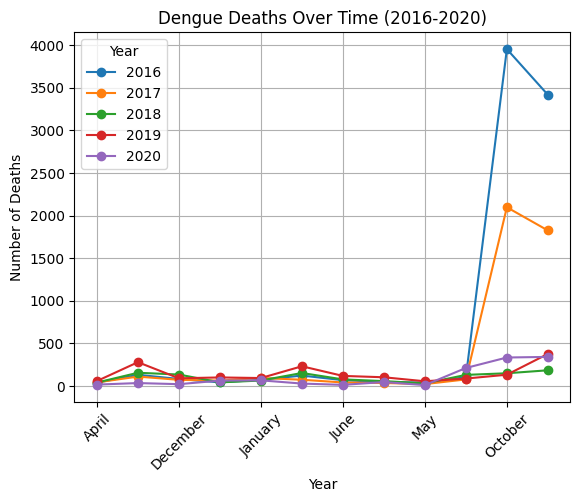

In [18]:
plt.figure(figsize=(12,6))
dengue_death_trend.plot(kind='line', marker='o')
plt.title("Dengue Deaths Over Time (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.grid()
plt.show()

<hr>

In [19]:
dengue_deaths_by_year = dengue.groupby('Year')['Dengue_Deaths'].sum()
print(dengue_deaths_by_year)

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64


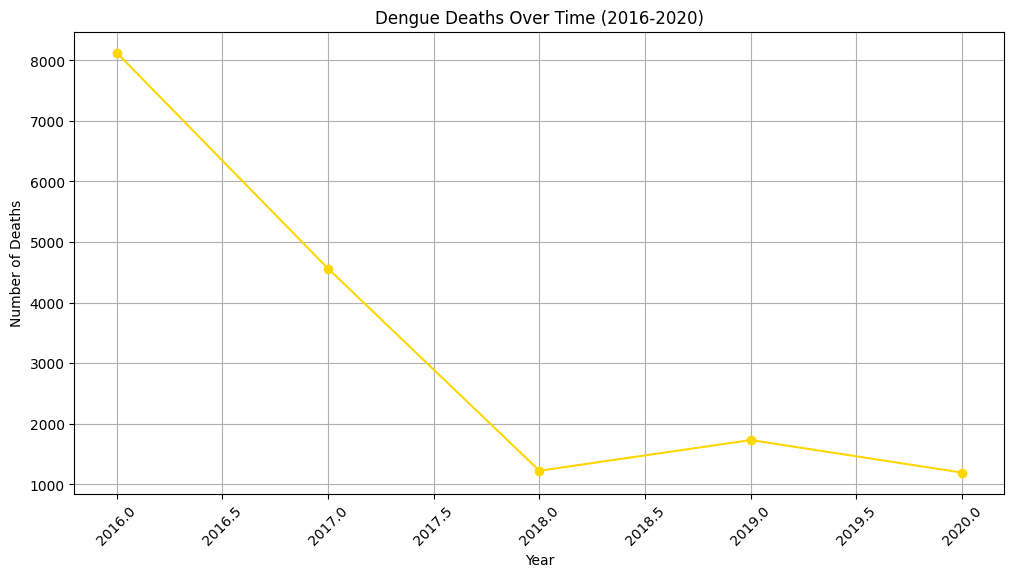

In [20]:
plt.figure(figsize=(12,6))
dengue_deaths_by_year.plot(kind='line', marker='o', color='gold')
plt.title("Dengue Deaths Over Time (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.grid()
plt.xticks(rotation=45)
plt.show()

<hr>

<h1>Insight 3<h1>
<p>It appears that most of the Dengue Deaths occurs starting from May to September which is also the wet season where mosquitoes are active for breeding season. But it also shows that the number of Deaths starting from 2016 are decreasing as the years passed by. The DOH alarmed when the Dengue Cases in 2016 rapidly grows same also with the number of Dengue Deaths. That's why they made a lot of vaccines that prevent fatality and they also educate people on how they are going to protect themselves by simply keeping their surroundings clean.

<hr>

In [21]:
dengue_deaths_by_month = dengue.groupby('Month')['Dengue_Deaths'].sum()
print(dengue_deaths_by_month)

Month
April         200
August        714
December      404
February      315
January       394
July          611
June          322
March         291
May           162
November      613
October      6670
September    6148
Name: Dengue_Deaths, dtype: int64


<hr>
<h1>4. What is the correlation between the number of dengue cases and deaths over time?<h1>

In [22]:
case_death_corr = dengue["Dengue_Cases"].corr(dengue["Dengue_Deaths"])
total_cases = dengue["Dengue_Cases"].sum()
total_deaths = dengue["Dengue_Deaths"].sum()

print(f"Total Dengue Cases: {total_cases}")
print(f"Total Dengue Deaths: {total_deaths}")
print(f"Correlation between dengue cases and deaths: {case_death_corr:.2f}")

Total Dengue Cases: 1147425
Total Dengue Deaths: 16844
Correlation between dengue cases and deaths: 0.04


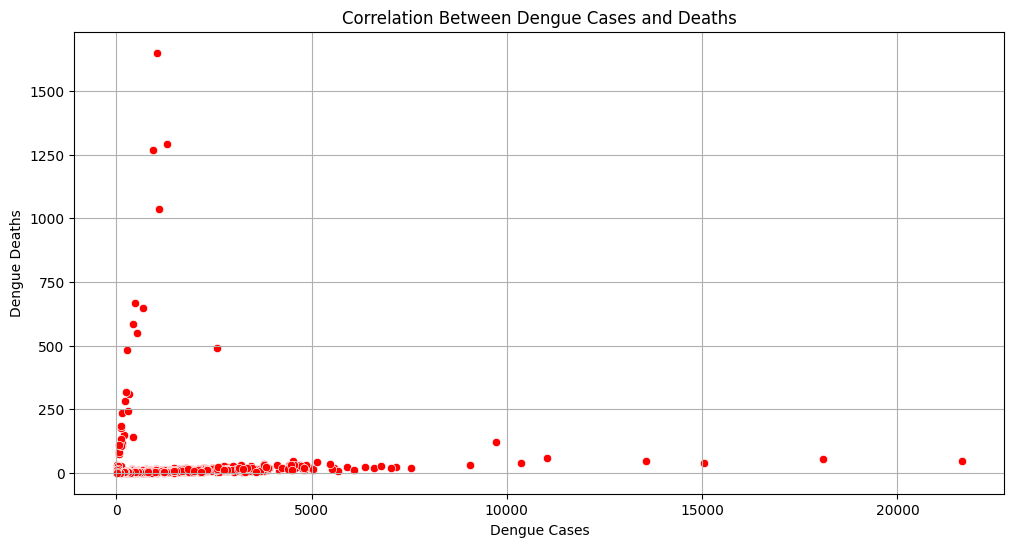

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], color="red")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.title("Correlation Between Dengue Cases and Deaths")
plt.grid(True)
plt.show()

<hr>

<h1>Insight 4<h1>
<p>The number of dengue cases does not strongly correlate with the number of dengue-related deaths. This indicates a very weak positive relationship between the two. In other words, an increase in dengue cases does not necessarily lead to a rise in deaths. Although the total number of dengue cases is high, the relatively low fatality rate suggests that medical treatment and public health interventions may be effective in preventing deaths.<p>

<hr>
<h1>5. Which region had the highest number of dengue cases overall?<h1>

In [24]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum()
print(region_cases)

Region
BARMM           11537
CAR             30582
NCR            115966
Region I        59066
Region II       45141
Region III     131064
Region IV-A    163029
Region IV-B     30849
Region IX       47781
Region V        22167
Region VI      117523
Region VII     110683
Region VIII     51983
Region X        82437
Region XI       32522
Region XII      59802
Region XIII     35293
Name: Dengue_Cases, dtype: int64


In [25]:
print(region_cases.nlargest(1))

Region
Region IV-A    163029
Name: Dengue_Cases, dtype: int64


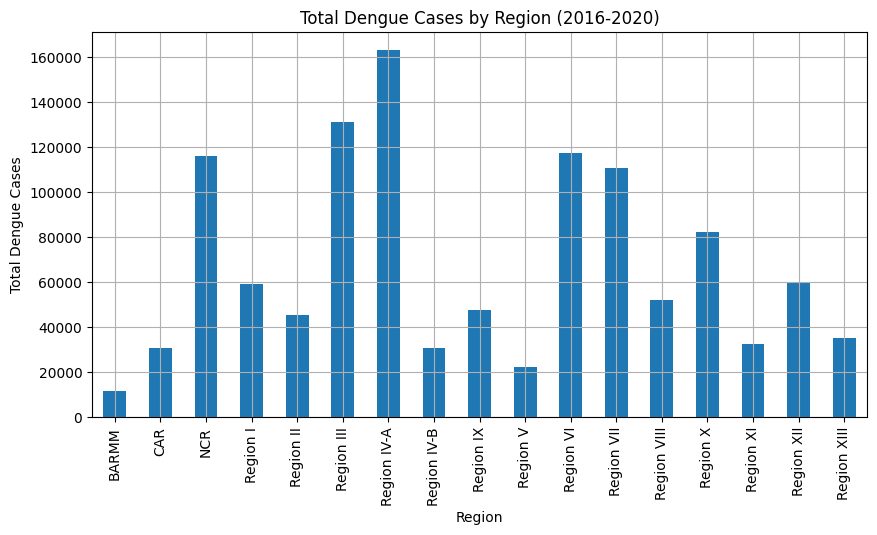

In [26]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum()
plt.figure(figsize=(10, 5))
region_cases.plot(kind='bar')
plt.ylabel("Total Dengue Cases")
plt.xlabel("Region")
plt.title("Total Dengue Cases by Region (2016-2020)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<hr>

<h1>Insight 5<h1>
<p>NCR got the most Dengue Cases among other regions mainly because it is one of the most populated region and mostly affected by flooding due to polluted environment.<p>

<hr>
<h1>6. Which region had the highest number of dengue deaths?<h1>

In [27]:
region_deaths = dengue.groupby("Region")["Dengue_Deaths"].sum()
region_deaths

Region
BARMM           332
CAR            1008
NCR            4008
Region I        157
Region II       193
Region III      482
Region IV-A     652
Region IV-B     130
Region IX       532
Region V        185
Region VI      1825
Region VII     1760
Region VIII     585
Region X        848
Region XI       385
Region XII     2796
Region XIII     966
Name: Dengue_Deaths, dtype: int64

In [28]:
print(region_deaths.nlargest(1))

Region
NCR    4008
Name: Dengue_Deaths, dtype: int64


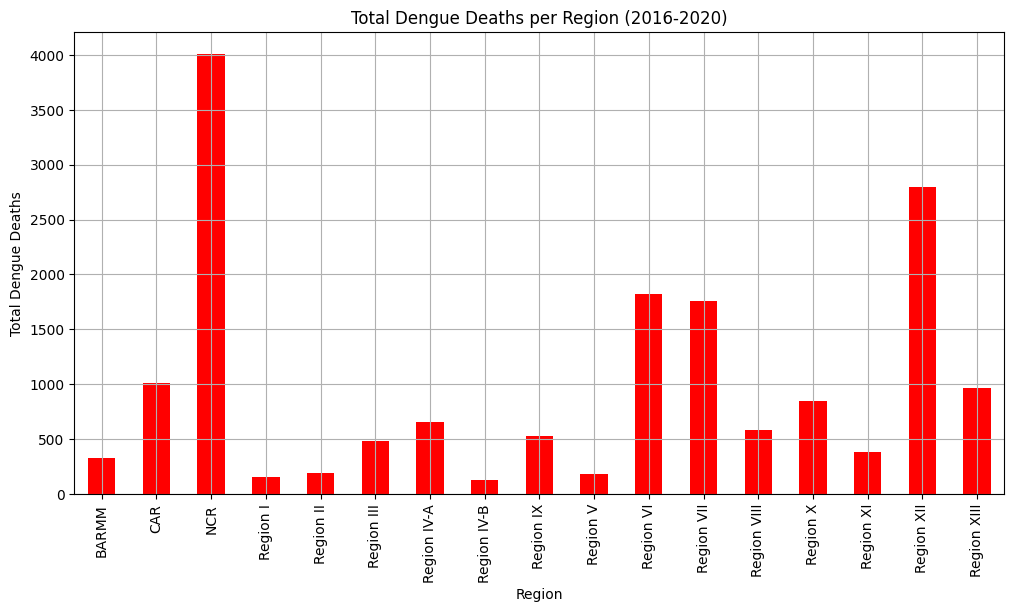

In [29]:
plt.figure(figsize=(12, 6))
region_deaths.plot(kind='bar', color='red')
plt.ylabel("Total Dengue Deaths")
plt.xlabel("Region")
plt.title("Total Dengue Deaths per Region (2016-2020)")
plt.grid(True)
plt.show()

<hr>

<h1>Insight 6<h1>
<p>The bar chart clearly shows the uneven impact of dengue deaths across different regions, with a noticeable spike in NCR compared to the others. In fact, NCR's death toll is more than 30 times higher than in regions like IV-B or Region I. This large gap between regions may reflect differences in healthcare access, disease management, or the accuracy of reporting systems.<p> 

<hr>
<h1>7. What is the dengue case-to-death ratio for each region?

In [30]:
region_data = dengue.groupby("Region")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
region_data["Case_to_Death_Ratio"] = region_data["Dengue_Cases"] / region_data["Dengue_Deaths"]
print(region_data[["Region", "Case_to_Death_Ratio"]])

         Region  Case_to_Death_Ratio
0         BARMM            34.750000
1           CAR            30.339286
2           NCR            28.933633
3      Region I           376.216561
4     Region II           233.891192
5    Region III           271.917012
6   Region IV-A           250.044479
7   Region IV-B           237.300000
8     Region IX            89.813910
9      Region V           119.821622
10    Region VI            64.396164
11   Region VII            62.888068
12  Region VIII            88.859829
13     Region X            97.213443
14    Region XI            84.472727
15   Region XII            21.388412
16  Region XIII            36.535197


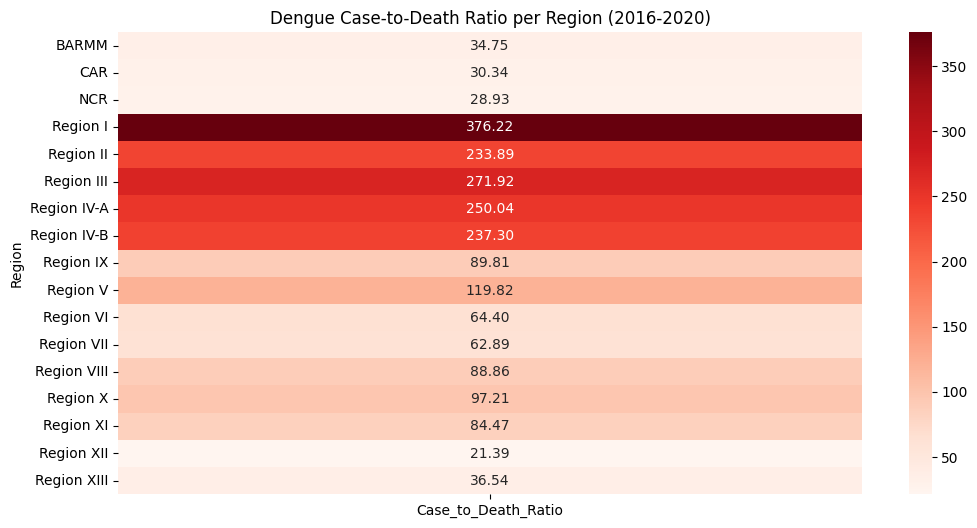

In [31]:
region_data_pivot = region_data.set_index("Region")[["Case_to_Death_Ratio"]]
plt.figure(figsize=(12, 6))
sns.heatmap(region_data_pivot, annot=True, cmap="Reds", fmt=".2f")
plt.title("Dengue Case-to-Death Ratio per Region (2016-2020)")
plt.show()

<hr>

<h1>Insight 7<h1>
<p> Region I has the highest case-to-death ratio at 376.22, meaning there are about 376 dengue cases for every one death. This indicates the lowest fatality rate among all regions, which is a positive sign of effective health outcomes. The data clearly shows that Region I has the most favorable case-to-death ratio in the country.<p>

<hr>
<h1>8. Are there any regions where the number of dengue deaths is disproportionately high compared to cases?<h1>

In [32]:
region_data = dengue.groupby("Region")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
region_data["CFR (%)"] = (region_data["Dengue_Deaths"] / region_data["Dengue_Cases"]) * 100
print(region_data[["Region", "CFR (%)"]])

         Region   CFR (%)
0         BARMM  2.877698
1           CAR  3.296057
2           NCR  3.456185
3      Region I  0.265804
4     Region II  0.427549
5    Region III  0.367759
6   Region IV-A  0.399929
7   Region IV-B  0.421408
8     Region IX  1.113413
9      Region V  0.834574
10    Region VI  1.552888
11   Region VII  1.590127
12  Region VIII  1.125368
13     Region X  1.028664
14    Region XI  1.183814
15   Region XII  4.675429
16  Region XIII  2.737087


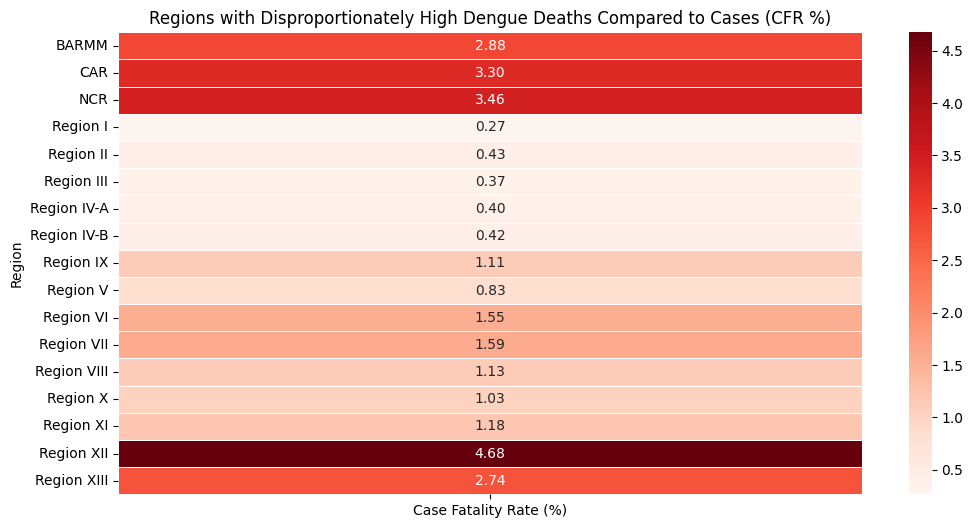

In [33]:
region_data = dengue.groupby("Region")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
region_data["Case Fatality Rate (%)"] = (region_data["Dengue_Deaths"] / region_data["Dengue_Cases"]) * 100
region_data_pivot = region_data.set_index("Region")[["Case Fatality Rate (%)"]]
plt.figure(figsize=(12, 6))
sns.heatmap(region_data_pivot, annot=True, cmap="Reds", linewidths=0.5, fmt=".2f")
plt.title("Regions with Disproportionately High Dengue Deaths Compared to Cases (CFR %)")
plt.show()

<hr>
<h1>Insight 8<h1>
<p>Regions where the number of dengue deaths is disproportionately high compared to cases are:
Region XII(4.68%), NCR(3.46%), CAR(3.30%), BARMM(2.88%), Region XIII(2.74%)  
                                                   
Region XII has the highest case fatality rate at 4.68%, meaning about 5 out of every 100 dengue cases result in death. This is significantly higher than the national average and indicates a disproportionately high number of deaths compared to cases.<p>

<hr>
<h1>9. Which months typically record the highest number of dengue cases?<h1>

In [34]:
dengue_cases_by_month

Month
April         32508
August       187554
December      88431
February      77801
January       84328
July         138242
June          58110
March         57576
May           32387
November      94900
October      117645
September    177943
Name: Dengue_Cases, dtype: int64

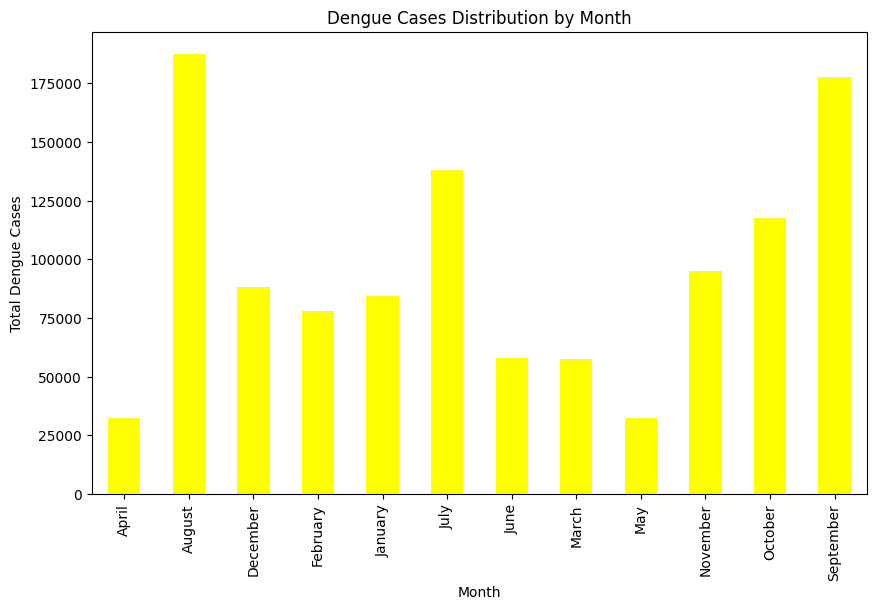

In [35]:
plt.figure(figsize=(10, 6))
dengue_cases_by_month.plot(kind='bar', color='yellow')
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.title("Dengue Cases Distribution by Month")
plt.show()

<hr>

<h1>Insight 9<h1>
<p>August consistently records the highest number of dengue cases, with 187,554 cases, followed by September (177,943) and October (117,645). These months fall within the rainy season in the Philippines, which creates ideal breeding conditions for mosquitoes due to stagnant water. 

Dengue cases start to rise in June (58,110), peak in August, and gradually decline toward December. This clearly shows a seasonal pattern in dengue transmission, with higher cases during and shortly after the rainy season (June to October). 

To reduce the spread of dengue, preventive measures and awareness campaigns should be strengthened before and during these months. Health authorities can use this trend to plan targeted vector control efforts, such as clean-up drives, larvicide spraying, and public education campaigns, especially from June to October.<p>

<hr>
<h1>10. During which months do dengue deaths peak?<h1>

In [36]:
dengue_deaths_by_month = dengue.groupby("Month")["Dengue_Deaths"].sum()
print(dengue_deaths_by_month)

Month
April         200
August        714
December      404
February      315
January       394
July          611
June          322
March         291
May           162
November      613
October      6670
September    6148
Name: Dengue_Deaths, dtype: int64


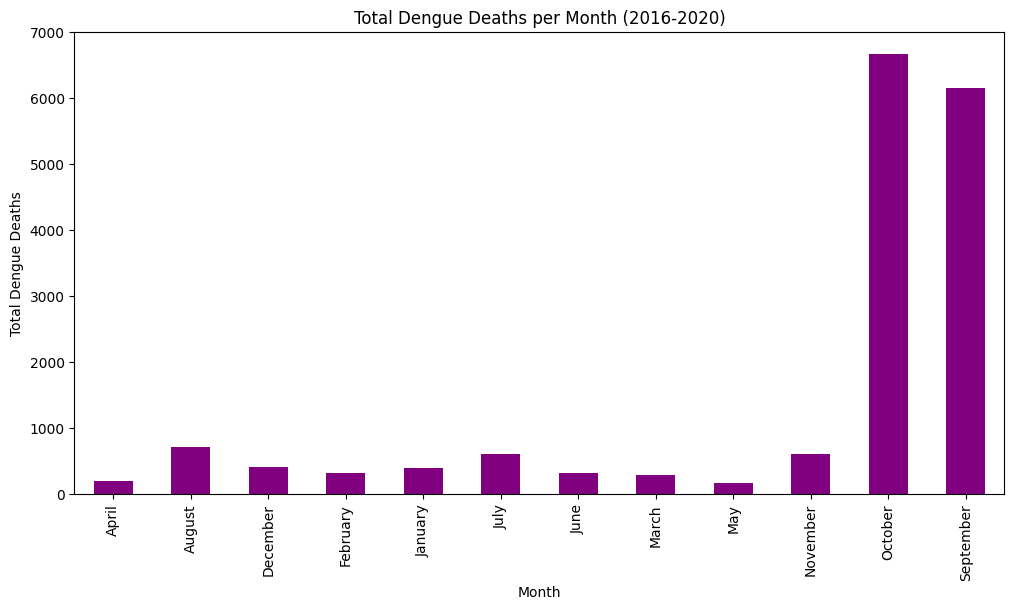

In [37]:
plt.figure(figsize=(12,6))
dengue_deaths_by_month.plot(kind='bar', color='purple')
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Total Dengue Deaths")
plt.title("Total Dengue Deaths per Month (2016-2020)")
plt.show()

<h1>Insight  10<h1>
<p>Dengue-related deaths show a clear seasonal pattern, peaking during the late rainy season. The highest number of fatalities occurs in October (6,670 deaths), followed closely by September (6,148 deaths). Together, these two months account for the majority of dengue deaths throughout the year.

There is a steady rise in deaths from June to August, with July (611 deaths) and August (714 deaths) indicating the early stages of this upward trend. This suggests that dengue transmission begins increasing around June, with a drastic spike by September and October.

On the other hand, April (200 deaths) and May (162 deaths) record the lowest number of deaths, likely due to drier conditions that reduce mosquito breeding. Following the October peak, deaths decline sharply in November (613) and December (404), which may reflect seasonal changes or the impact of public health interventions.<p>

<hr>
<h1>11. Are there certain months where dengue deaths increase significantly even when cases remain stable?<h1>

In [38]:
monthly_data = dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum()
monthly_data["Death_Rate"] = (monthly_data["Dengue_Deaths"] / monthly_data["Dengue_Cases"]) * 100
print(monthly_data)

           Dengue_Cases  Dengue_Deaths  Death_Rate
Month                                             
April             32508            200    0.615233
August           187554            714    0.380690
December          88431            404    0.456853
February          77801            315    0.404879
January           84328            394    0.467223
July             138242            611    0.441979
June              58110            322    0.554121
March             57576            291    0.505419
May               32387            162    0.500201
November          94900            613    0.645943
October          117645           6670    5.669599
September        177943           6148    3.455039


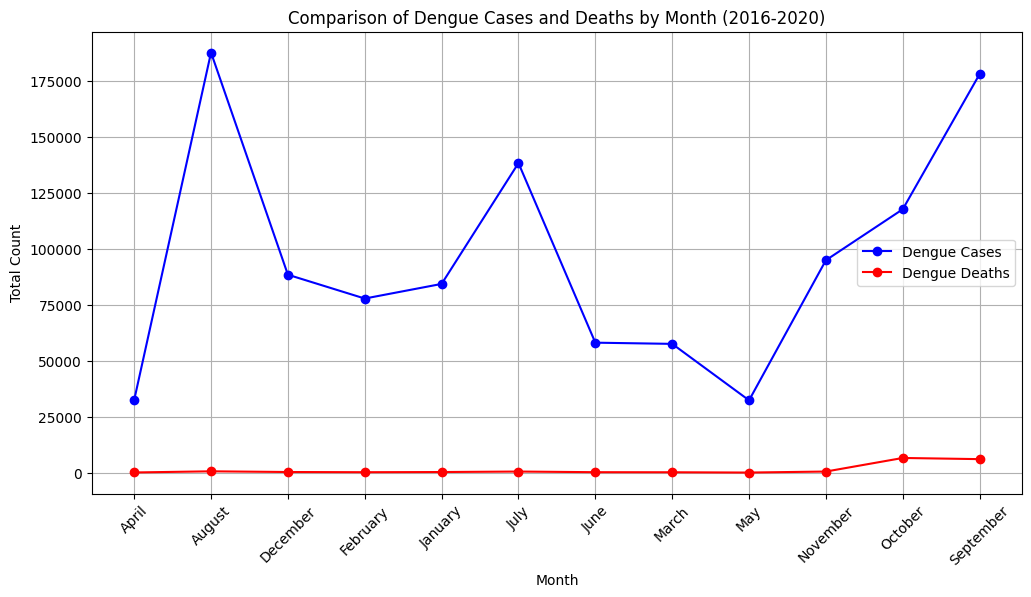

In [39]:
monthly_data = dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum()
plt.figure(figsize=(12,6))
plt.plot(monthly_data.index, monthly_data["Dengue_Cases"], marker='o',  color='blue', label="Dengue Cases")
plt.plot(monthly_data.index, monthly_data["Dengue_Deaths"], marker='o',  color='red', label="Dengue Deaths")
plt.xlabel("Month")
plt.ylabel("Total Count")
plt.title("Comparison of Dengue Cases and Deaths by Month (2016-2020)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<hr>
<h1>Insight 11<h1>
<p>October stands out with a death rate of 5.67%, which is significantly higher than any other month. Although the number of cases in October (117,645) is not the highest compared to August, which has 187,554 cases the number of deaths (6,670) is disproportionately high.

September follows with the second-highest death rate at 3.45%, suggesting increased severity or possible delays in medical response during this period. These unusually high death rates in both September and October indicate potential systemic issues that go beyond just the volume of cases and warrant further investigation.<p>

<hr>
<h1>12. What percentage of reported dengue cases result in death?<h1>

In [40]:
total_cases = dengue["Dengue_Cases"].sum()
total_deaths = dengue["Dengue_Deaths"].sum()
death_percentage = (total_deaths / total_cases) * 100
print(f"Total Dengue Cases: {total_cases}")
print(f"Total Dengue Deaths: {total_deaths}")
print(f"Percentage of Reported Dengue Cases Resulting in Death: {death_percentage:.2f}%")

Total Dengue Cases: 1147425
Total Dengue Deaths: 16844
Percentage of Reported Dengue Cases Resulting in Death: 1.47%


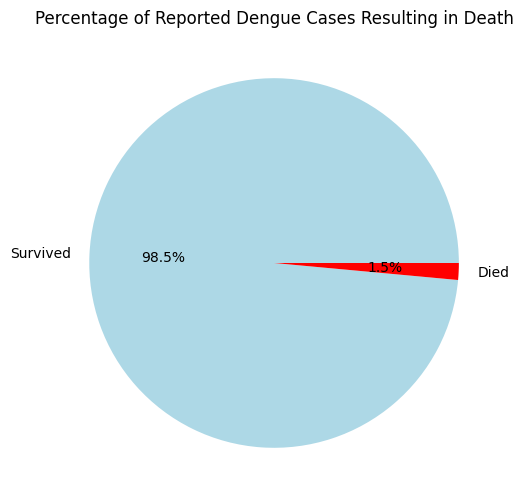

In [41]:
total_cases = dengue["Dengue_Cases"].sum()
total_deaths = dengue["Dengue_Deaths"].sum()
death_percentage = (total_deaths / total_cases) * 100
survival_percentage = 100 - death_percentage
labels = ["Survived", "Died"]
sizes = [survival_percentage, death_percentage]
colors = ["lightblue", "red"]
plt.figure(figsize=(12,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors)
plt.title("Percentage of Reported Dengue Cases Resulting in Death")
plt.show()

<hr>
<h1>Insight 12<h1>
<p>Out of 1,147,425 total reported cases, only 16,844 resulted in death, which translates to a fatality rate of just 1.47%. majority of dengue patients 98.53% survived the infection, indicating that dengue is generally treatable when detected early and managed properly.<p>

<hr>
<h1>13. Which year had the most dengue cases?<h1>

In [42]:
dengue_cases_by_year = dengue.groupby("Year")["Dengue_Cases"].sum().reset_index()
max_cases_year = dengue_cases_by_year.loc[dengue_cases_by_year["Dengue_Cases"].idxmax()]
print("Yearly Dengue Cases:")
print(dengue_cases_by_year)
print("\nYear with the Most Dengue Cases:")
print(f"Year: {max_cases_year['Year']}, Cases: {max_cases_year['Dengue_Cases']}")

Yearly Dengue Cases:
   Year  Dengue_Cases
0  2016        209544
1  2017        154155
2  2018        250783
3  2019        441902
4  2020         91041

Year with the Most Dengue Cases:
Year: 2019, Cases: 441902


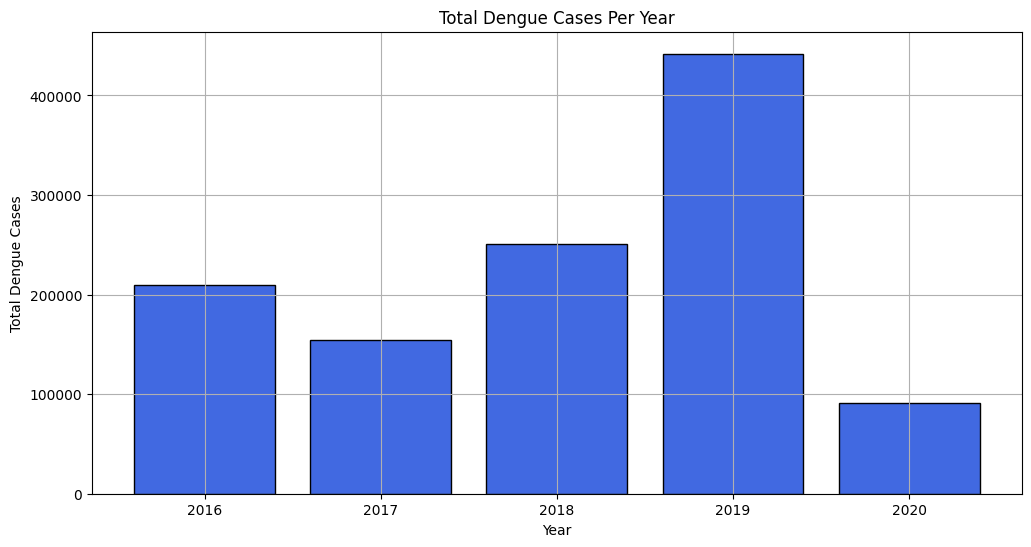

In [43]:
dengue_cases_by_year = dengue.groupby("Year")["Dengue_Cases"].sum().reset_index()
plt.figure(figsize=(12,6))
plt.bar(dengue_cases_by_year["Year"], dengue_cases_by_year["Dengue_Cases"], color="royalblue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.title("Total Dengue Cases Per Year")
plt.xticks(dengue_cases_by_year["Year"]) 
plt.grid(True)
plt.show()

<hr>

<h1>Insight 13<h1>
<p>Dengue cases increased steadily from 2016 to 2019, with a noticeable rise each year, showing a growing public health concern over time. The year 2019 recorded the highest number of dengue cases, reaching a total of 441,902, which was a significant jump compared to previous years and marked the peak of the five-year trend.

This sudden spike in 2019 may have been caused by various factors, such as changes in weather patterns, increased mosquito populations, rapid urbanization, or lapses in mosquito control efforts. In contrast, 2020 showed a sharp decline in cases, with only 91,041 reported, suggesting a strong reversal in the trend right after the 2019 outbreak.

One possible reason for the drop in 2020 could be the COVID-19 pandemic, which led to lockdowns and changes in public behavior, possibly reducing exposure to mosquito bites and encouraging cleaner environments.<p>

<hr>
<h1>14. Which year had the highest dengue mortality rate?<h1>

In [44]:
yearly_data = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
yearly_data["Mortality_Rate"] = (yearly_data["Dengue_Deaths"] / yearly_data["Dengue_Cases"]) * 100
max_mortality_year = yearly_data.loc[yearly_data["Mortality_Rate"].idxmax()]
print("Yearly Dengue Mortality Rates:")
print(yearly_data)
print("\nYear with the Highest Dengue Mortality Rate:")
print(f"Year: {max_mortality_year['Year']}, Mortality Rate: {max_mortality_year['Mortality_Rate']:.2f}%")

Yearly Dengue Mortality Rates:
   Year  Dengue_Cases  Dengue_Deaths  Mortality_Rate
0  2016        209544           8127        3.878422
1  2017        154155           4563        2.960008
2  2018        250783           1226        0.488869
3  2019        441902           1733        0.392168
4  2020         91041           1195        1.312595

Year with the Highest Dengue Mortality Rate:
Year: 2016.0, Mortality Rate: 3.88%


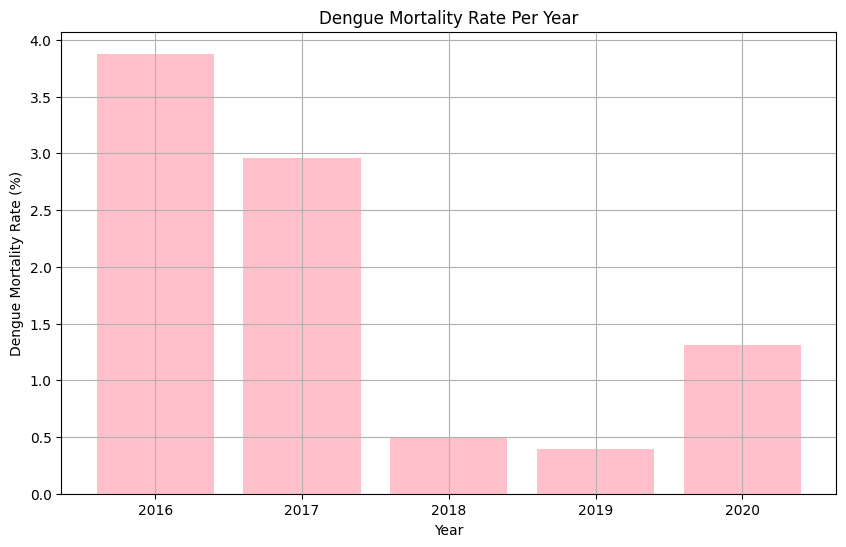

In [45]:
yearly_data = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
yearly_data["Mortality_Rate"] = (yearly_data["Dengue_Deaths"] / yearly_data["Dengue_Cases"]) * 100
plt.figure(figsize=(10,6))
plt.bar(yearly_data["Year"], yearly_data["Mortality_Rate"], color="pink")
plt.xlabel("Year")
plt.ylabel("Dengue Mortality Rate (%)")
plt.title("Dengue Mortality Rate Per Year")
plt.xticks(yearly_data["Year"])
plt.grid(True)
plt.show()


<hr>
<h1>Insight 14<h1>
<p>The year 2016 had the highest dengue mortality rate, with 3.88% of reported cases resulting in death, making it the deadliest year in terms of severity despite having fewer total cases than 2019.

Although 2019 had the highest number of dengue cases, its mortality rate was only 0.39%, suggesting that better medical response, faster diagnosis, or improved access to treatment may have helped save more lives that year.

A significant drop in mortality rate is seen from 2016 to 2018, with 2018 recording a remarkably low rate of just 0.49%, which indicates improvements in healthcare management and possibly early detection efforts.

2020 showed a slightly increased mortality rate of 1.31% despite the lower number of cases, which might be linked to the strain on healthcare systems due to the COVID-19 pandemic or delayed hospital visits during lockdowns.<p>

<hr>
<h1>15. How does the average number of cases per year vary across different regions<h1>

In [46]:
average_cases_per_region = dengue.groupby(["Year", "Region"])["Dengue_Cases"].mean().reset_index()
print("Average Number of Dengue Cases Per Year by Region:")
print(average_cases_per_region)

Average Number of Dengue Cases Per Year by Region:
    Year       Region  Dengue_Cases
0   2016        BARMM    182.583333
1   2016          CAR    763.666667
2   2016          NCR   1083.500000
3   2016     Region I    690.083333
4   2016    Region II    324.250000
..   ...          ...           ...
80  2020  Region VIII    402.666667
81  2020     Region X    518.750000
82  2020    Region XI    161.333333
83  2020   Region XII    363.583333
84  2020  Region XIII    331.916667

[85 rows x 3 columns]


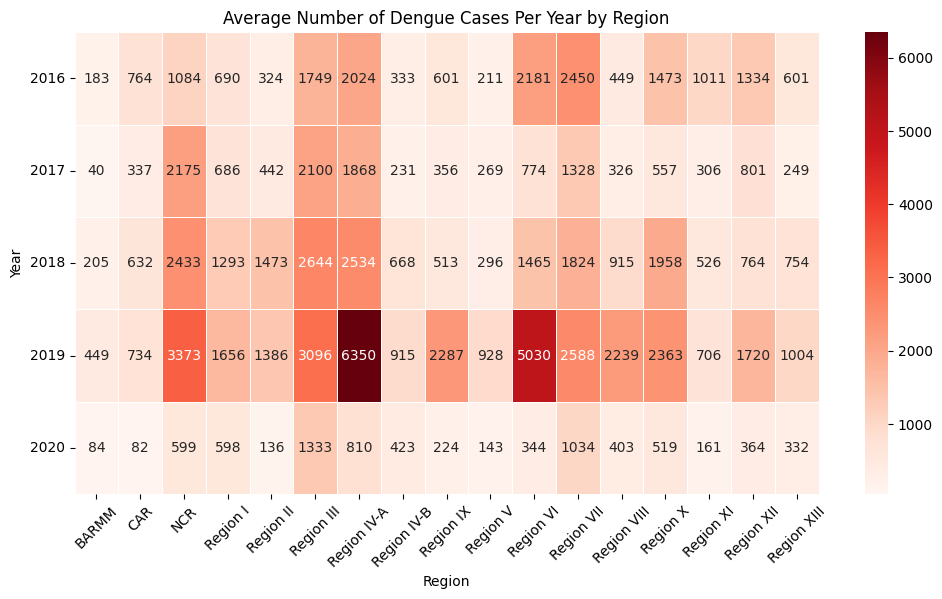

In [47]:
heatmap_cases = dengue.groupby(["Year", "Region"])["Dengue_Cases"].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_cases, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Region")
plt.ylabel("Year")
plt.title("Average Number of Dengue Cases Per Year by Region")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<hr>
<h1>Insight 15<h1>
<p>The heatmap clearly shows variations in case intensity across regions and years, with some regions experiencing significant spikes in certain years, possibly due to localized outbreaks or changes in weather patterns.

Urbanized or densely populated regions often appear with darker shades on the heatmap, indicating that higher population density and urban conditions might contribute to more favorable breeding grounds for mosquitoes.

In 2019, many regions recorded their highest average cases, aligning with the national trend of a major outbreak that year, and showing that the epidemic was widespread rather than isolated.<p>

<hr>
<h1>16. Is there a correlation between dengue case numbers and year-over-year changes in deaths?<h1>

In [48]:
yearly_data = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
yearly_data["Deaths_Change"] = yearly_data["Dengue_Deaths"].diff()
yearly_data = yearly_data.dropna()
correlation = yearly_data["Dengue_Cases"].corr(yearly_data["Deaths_Change"])
print("Yearly Dengue Cases and Year-over-Year Change in Deaths:")
print(yearly_data)
print(f"\nCorrelation Coefficient: {correlation:.2f}")

Yearly Dengue Cases and Year-over-Year Change in Deaths:
   Year  Dengue_Cases  Dengue_Deaths  Deaths_Change
1  2017        154155           4563        -3564.0
2  2018        250783           1226        -3337.0
3  2019        441902           1733          507.0
4  2020         91041           1195         -538.0

Correlation Coefficient: 0.44


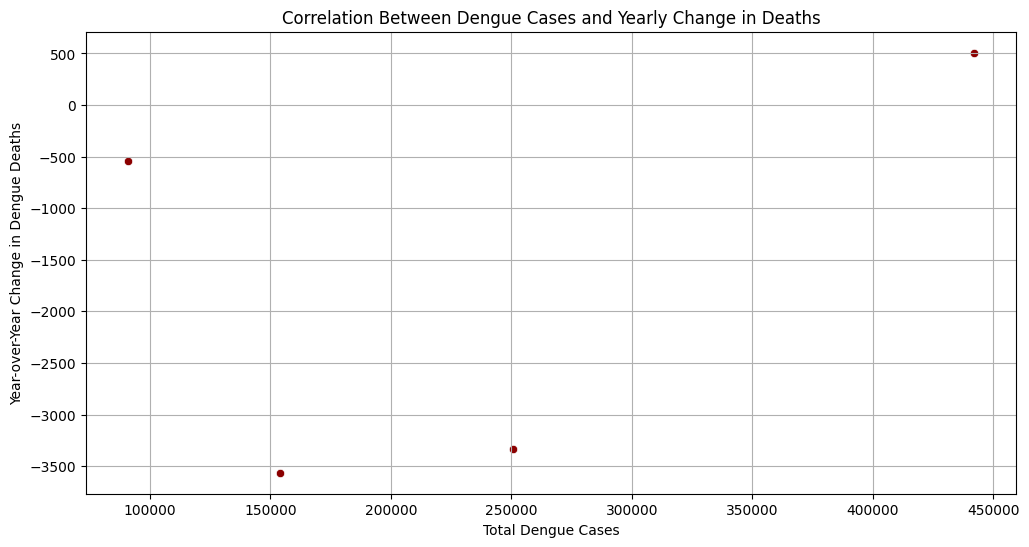

In [49]:
yearly_data = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
yearly_data["Deaths_Change"] = yearly_data["Dengue_Deaths"].diff()
yearly_data = yearly_data.dropna()
plt.figure(figsize=(12,6))
sns.scatterplot(x=yearly_data["Dengue_Cases"], y=yearly_data["Deaths_Change"], color="darkred")
plt.xlabel("Total Dengue Cases")
plt.ylabel("Year-over-Year Change in Dengue Deaths")
plt.title("Correlation Between Dengue Cases and Yearly Change in Deaths")
plt.grid(True)
plt.show()

<hr>
<h1>Insight 16<h1>
<p>The correlation coefficient is 0.44, which indicates a moderate positive correlation between the number of dengue cases and the year-over-year change in deaths. This suggests that increases in dengue cases may be somewhat associated with increases in deaths—but not strongly.<p>

<hr>
<h1>17. What are the Top 5 Months with the least Dengue Cases<h1>

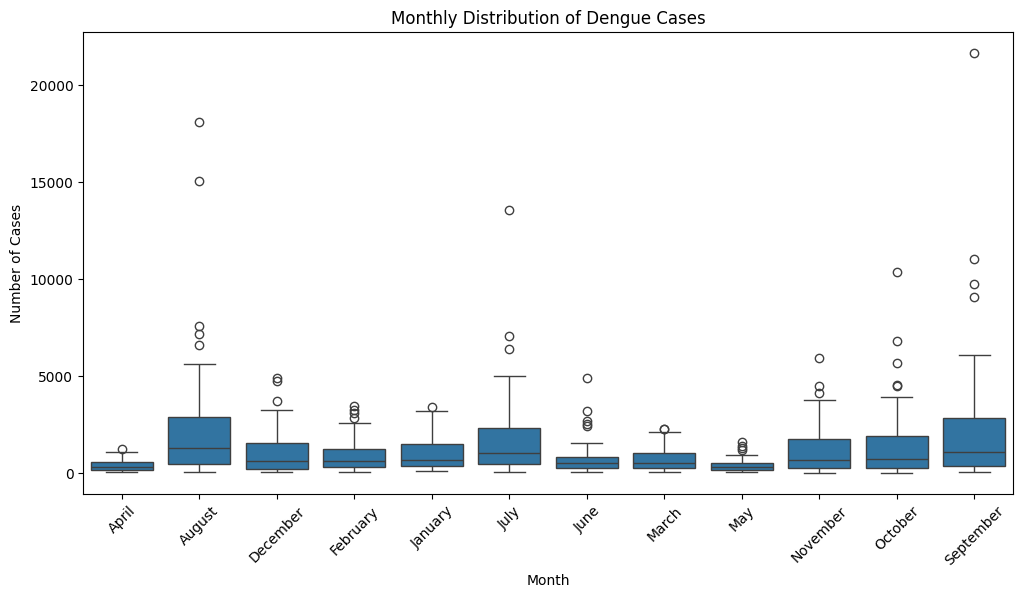

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Dengue_Cases', data=dengue)
plt.title("Monthly Distribution of Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()

In [51]:
dengue_cases_by_month.nsmallest(5)

Month
May         32387
April       32508
March       57576
June        58110
February    77801
Name: Dengue_Cases, dtype: int64

<hr>
<h1>Insight 17<h1>
<p>The top 5 months with the least cases were: May, April, March, June, and February, which mostly fall in the dry season or just before the onset of heavy rains in many tropical regions.

Lower mosquito activity during these months is likely a key reason for the reduced case counts, as mosquitoes thrive in warm, humid, and wet environments—conditions less common in the earlier months of the year.<p>

<hr>
<h1>18. Top 5 with Most Dengue Cases (2016-2020)<h1>

In [52]:
regional_dengue_case_yearly_trend = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum().unstack()
regional_dengue_case_yearly_trend

Year,2016,2017,2018,2019,2020
Region,,,,,
BARMM,2191,485,2460,5393,1008
CAR,9164,4045,7584,8808,981
NCR,13002,26103,29200,40478,7183
Region I,8281,8236,15511,19867,7171
Region II,3891,5310,17678,16634,1628
Region III,20989,25200,31726,37158,15991
Region IV-A,24282,22421,30410,76195,9721
Region IV-B,3999,2770,8019,10984,5077
Region IX,7215,4274,6161,27447,2684


<Figure size 1200x600 with 0 Axes>

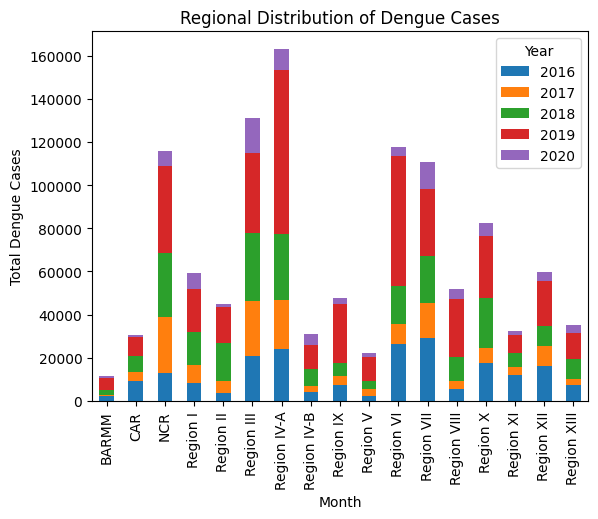

In [53]:
plt.figure(figsize=(12, 6))
regional_dengue_case_yearly_trend.plot(kind='bar', stacked=True)
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.title("Regional Distribution of Dengue Cases")
plt.show()

In [54]:
top5_regional_dengue_case_yearly = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum().nlargest(5)
top5_regional_dengue_case_yearly

Region       Year
Region IV-A  2019    76195
Region VI    2019    60357
NCR          2019    40478
Region III   2019    37158
             2018    31726
Name: Dengue_Cases, dtype: int64

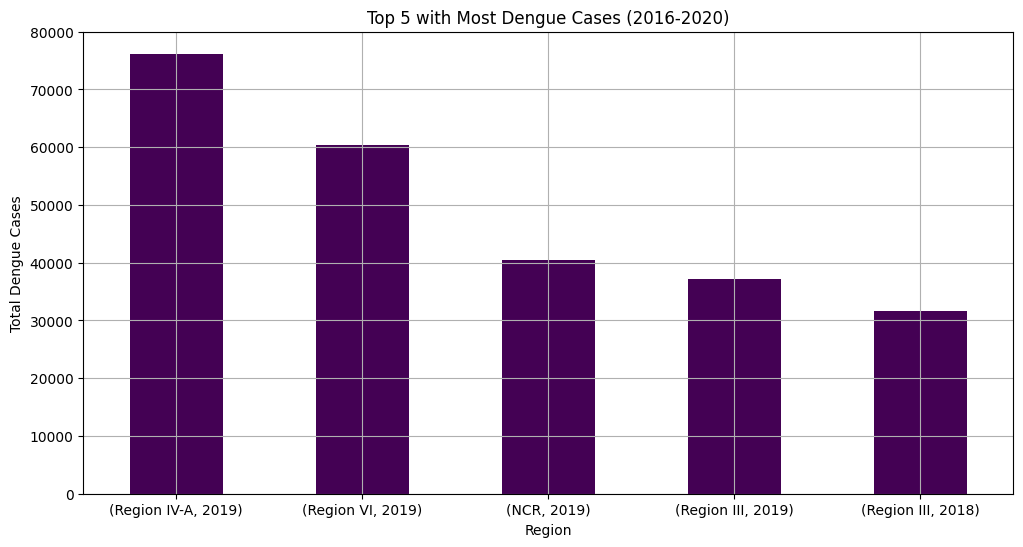

In [55]:
plt.figure(figsize=(12, 6))
top5_regional_dengue_case_yearly.plot(kind='bar', colormap='viridis')
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.title("Top 5 with Most Dengue Cases (2016-2020)")
plt.grid()
plt.xticks(rotation=0)
plt.show()

<hr>
<h1>Insight 18<h1>
<p>Region IV-A (Calabarzon) had the highest number of dengue cases in a single year, with 76,195 cases in 2019, highlighting it as a major hotspot during the peak outbreak.

Region VI (Western Visayas) followed closely with 60,357 cases in 2019, also showing a severe outbreak in the same year. This suggests that 2019 was not only the worst year nationally but also significantly affected multiple regions across the country.

The National Capital Region (NCR) recorded 40,478 cases in 2019, indicating that urban areas are not exempt from high dengue transmission, likely due to population density and challenges in managing mosquito breeding grounds.

Region III (Central Luzon) appears twice in the Top 5, for both 2019 (37,158 cases) and 2018 (31,726 cases), showing a consistent and prolonged struggle with dengue. This indicates the need for long-term vector control and preventive strategies in the region.

All Top 5 entries occurred in either 2018 or 2019, which reinforces the observation that these years saw the most widespread and intense outbreaks across multiple regions, possibly due to favorable climate conditions, heavy rainfall, or weakened healthcare response systems.

The bar chart visually confirms a massive spike in dengue cases during 2019, across all the top regions, making it a critical year for national health authorities to analyze and learn from in terms of outbreak response.

These insights underscore the importance of region-specific surveillance and action plans, especially in high-density and high-risk areas like Region IV-A, Region VI, and NCR.

Monitoring patterns from these highly affected regions can provide early warning signs for future outbreaks, helping public health officials prevent similarly devastating surges.<p>

<hr>
<h1>19. Top 5 Region with least Casualties (2016-2020)<h1>


In [56]:
regional_dengue_death_yearly_trend = dengue.groupby(['Region', 'Year'])['Dengue_Deaths'].sum().unstack()
regional_dengue_death_yearly_trend

Year,2016,2017,2018,2019,2020
Region,,,,,
BARMM,243,2,33,31,23
CAR,888,12,8,27,73
NCR,2987,168,180,190,483
Region I,21,23,53,42,18
Region II,11,34,62,77,9
Region III,65,81,85,194,57
Region IV-A,108,110,157,242,35
Region IV-B,18,12,51,26,23
Region IX,41,313,54,108,16


<Figure size 1200x600 with 0 Axes>

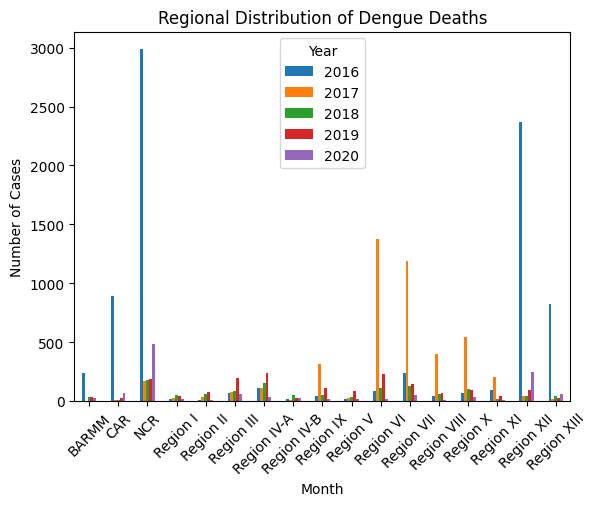

In [57]:
plt.figure(figsize=(12,6))
regional_dengue_death_yearly_trend.plot(kind='bar')
plt.title("Regional Distribution of Dengue Deaths")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()

In [58]:
top5_regional_dengue_death_yearly = dengue.groupby(['Region', 'Year'])['Dengue_Deaths'].sum().nsmallest(5)
top5_regional_dengue_death_yearly

Region     Year
BARMM      2017     2
CAR        2018     8
Region II  2020     9
           2016    11
CAR        2017    12
Name: Dengue_Deaths, dtype: int64

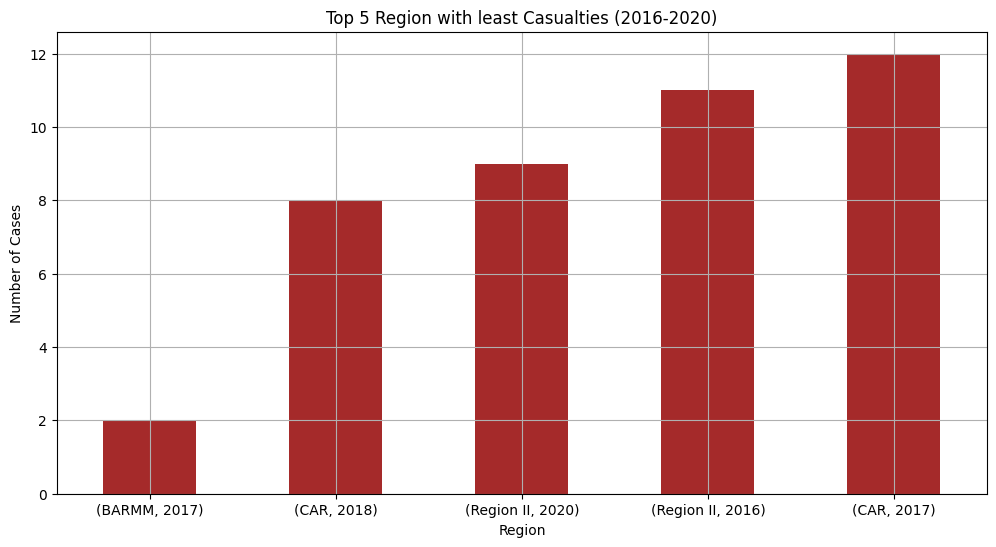

In [59]:
plt.figure(figsize=(12,6))
top5_regional_dengue_death_yearly.plot(kind='bar', color='brown')
plt.title("Top 5 Region with least Casualties (2016-2020)")
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.grid()
plt.xticks(rotation=0)
plt.show()

<h1>Insight 19<h1>
<p>BARMM in 2017 had the lowest recorded number of dengue deaths — just 2 deaths, which may reflect either low transmission or effective community-level control for that year.

CAR (Cordillera Administrative Region) and Region II (Cagayan Valley) consistently appear in the least-affected group across multiple years (CAR had 8 deaths in 2018 and 12 in 2017), suggesting a relatively low mortality burden in these highland or rural areas.

Regions with low death counts likely benefited from lower population density, better prevention, or fewer dengue cases overall, which reduced the chance of severe outcomes.<p>

<hr>
<h1>20. Average Number of Dengue Deaths Per Year by Region<h1>

In [60]:
average_deaths_per_region = dengue.groupby(["Year", "Region"])["Dengue_Deaths"].mean().reset_index()
print("Average Number of Dengue Deaths Per Year by Region:")
print(average_deaths_per_region)

Average Number of Dengue Deaths Per Year by Region:
    Year       Region  Dengue_Deaths
0   2016        BARMM      20.250000
1   2016          CAR      74.000000
2   2016          NCR     248.916667
3   2016     Region I       1.750000
4   2016    Region II       0.916667
..   ...          ...            ...
80  2020  Region VIII       1.000000
81  2020     Region X       2.916667
82  2020    Region XI       1.083333
83  2020   Region XII      20.666667
84  2020  Region XIII       4.916667

[85 rows x 3 columns]


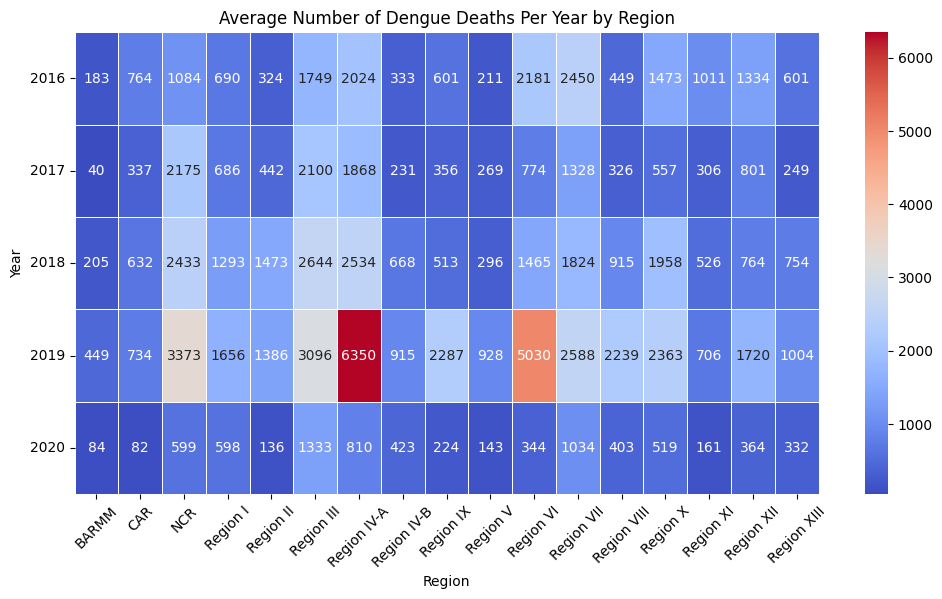

In [61]:
heatmap_deaths = dengue.groupby(["Year", "Region"])["Dengue_Cases"].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_deaths, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Region")
plt.ylabel("Year")
plt.title("Average Number of Dengue Deaths Per Year by Region")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<hr>
<h1>Insight 20<h1>

<p>NCR (National Capital Region) and Region VI (Western Visayas) show higher average deaths per year compared to most other regions.

These regions likely faced larger outbreaks, higher population density, or challenges in early detection and treatment.

Region XII and Region VII experienced sharp spikes in average deaths particularly in 2016 and 2017, respectively, which stand out on the heatmap.

These sudden increases could indicate local epidemics or overwhelmed health systems during those years.

CAR (Cordillera Administrative Region), BARMM, and Region I (Ilocos Region) consistently show lower averages, suggesting fewer fatal dengue cases.

These areas may have benefited from lower case volumes, effective mosquito control, or strong community health practices.

Urbanized or densely populated regions (like NCR and Central Visayas) generally report higher averages.

Rural and upland regions (such as CAR and BARMM) show lower mortality, which may be due to less exposure to mosquito breeding environments or different weather patterns.

In many regions, average deaths declined slightly by 2020, which might reflect improvements in dengue management, early intervention, or effects of movement restrictions during the COVID-19 pandemic. <p>

<hr>

<b><h1><b><h1><b>
<h1>THE END....<h1><b>